In [ ]:
from networkx import *
import numpy as np
import matplotlib.pyplot as plt

Let's def a freeman function first.

In [ ]:
def freeman(graph):
  degrees = np.array([d[1] for d in graph.degree])
  N = graph.number_of_nodes()
  return sum(max(degrees) - degrees) / ((N - 1) * (N - 2))

Variables to control the flow.

In [ ]:
VERBOSE = True

It's easier if we start from complete graph and then remove random edge, as it's the Erdős–Rényi model in reverse.

In [ ]:
G = complete_graph(8)
edges_to_remove = np.random.permutation(list(G.edges))

In [ ]:
freeman_scores = np.zeros(G.number_of_edges() + 1)
freeman_scores[-1] = freeman(G)

In [ ]:
for i, edge in enumerate(edges_to_remove):
  G.remove_edge(*edge)
  if VERBOSE:
    print("Removed {} edge".format(edge))
  # We are clever and fill freeman_scores so that the graph with i edges is on i-th position
  freeman_scores[-(i+2)] = freeman(G)

Removed [3 7] edge
Removed [1 6] edge
Removed [2 3] edge
Removed [6 7] edge
Removed [2 5] edge
Removed [1 2] edge
Removed [3 5] edge
Removed [1 5] edge
Removed [0 2] edge
Removed [3 6] edge
Removed [0 4] edge
Removed [1 3] edge
Removed [4 6] edge
Removed [2 7] edge
Removed [4 5] edge
Removed [0 1] edge
Removed [2 6] edge
Removed [0 3] edge
Removed [0 7] edge
Removed [5 7] edge
Removed [4 7] edge
Removed [5 6] edge
Removed [1 7] edge
Removed [0 5] edge
Removed [1 4] edge
Removed [0 6] edge
Removed [3 4] edge
Removed [2 4] edge


Text(0.5, 1.0, 'Freeman scores for number of edges')

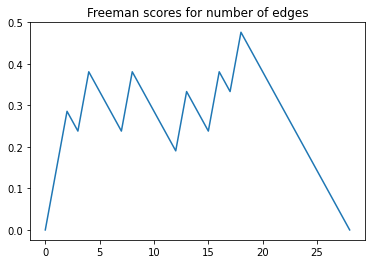

In [ ]:
plt.plot(range(len(freeman_scores)), freeman_scores)
plt.title("Freeman scores for number of edges")